 eq(1)
$$ P_{1}(\delta , \gamma ) = \frac{(1+\gamma)(1+d)}{2(1+\gamma d)}  $$  
eq(2)

$$ P_{2}(\delta , \gamma ) = \frac{(1-\gamma)(1-d)}{2(1+\gamma d)} $$              
where d = $ e ^{(-\frac{\delta ^{2}}{8 \sigma ^{2}})} $                            

For k = $ \delta / \sigma$

eq(3)
$$\frac{\partial P_{1}}{\partial \delta} = -\frac {kd(1-\gamma ^{2})}{8\sigma(1+\gamma d) ^{2}}  $$             
and
eq(4)
$$\frac{\partial P_{2}}{\partial \delta} =  \frac {kd(1-\gamma ^{2})}{8\sigma(1+\gamma d) ^{2}}  $$  



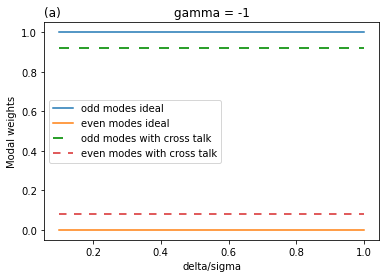

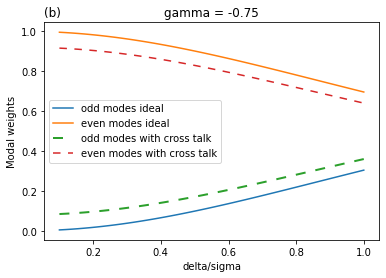

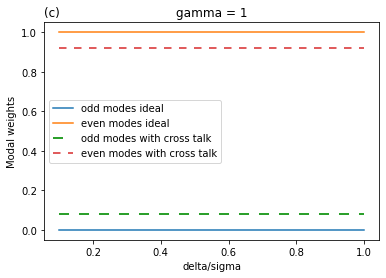

In [163]:


k = np.linspace(0.1,1)
sigma = 0.000327               ## in micro meter
delta = k*sigma          ## k = delta /sigma
p = np.square(k)/8       ## ((delta/sigma)^2)/8
d = np.exp(-p)
dashes = [5, 5,5, 5]  # 10 points on, 5 off, 100 on, 5 off

def plotf(gamma):
    p1 =((1+gamma)*(1+d))/(2*(1+gamma*d))               ## model weights for even mode
    p2 =((1-gamma)*(1-d))/(2*(1+gamma*d))               ## model weights for odd mode
    if gamma== -1:
        p4 = p2*0.92                                        ## model weights for 8% cross-talk for odd mode
        p3 = p1*0.92+0.08                                       ## model weights for 8% cross-talk for even mode
    else:
        p4 = p2*0.92+0.08
        p3 = p1*0.92
    
    fig, ax = mpt.subplots()
    ax.plot(k,p2,label = 'odd modes ideal')
    ax.plot(k,p1,label = 'even modes ideal')
    line1, = ax.plot(k,p4, '--', linewidth=2,
                 label='odd modes with cross talk')
    line1.set_dashes(dashes)

    line2, = ax.plot(k, p3, dashes=[5, 5, 5, 5],
                 label='even modes with cross talk')

    ax.legend(loc='center left')
    mpt.xlabel('delta/sigma')
    mpt.ylabel('Modal weights')    
    if gamma== -1:
        mpt.title('gamma = -1')
        mpt.title('(a)', loc='left')
    elif gamma == -0.75:
        mpt.title('gamma = -0.75')
        mpt.title('(b)', loc='left')
    elif gamma == 1:
        mpt.title('gamma = 1')
        mpt.title('(c)', loc='left')
        
    mpt.show()
    
plotf(-1)
plotf(-0.75)
plotf(1)
        
        



FIG. 3. Modal weights for the parity sorter for $\gamma = -1,1,-0.75.
Solid lines indicate theoretically expected modal weights with zero cross-talk while dashed lines indicate the expected modal weights for 8% cross-talk

FI for parity sorter:
$$F(\delta , \gamma ) = \sum \limits _{i=1,2}  \frac{1}{P_{i}(\delta , \gamma )} (\frac{\partial P_{i}(\delta , \gamma )}{\partial \delta})^ {2}$$ where $P_{1}(\delta , \gamma ),P_{2}(\delta , \gamma )$ are even and odd modal weights respectively.

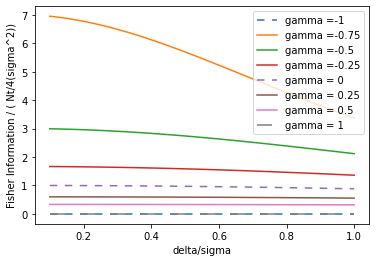

In [218]:
def fi(gamma):
    if gamma ==1 or gamma == -1:
        fi =( k*k*d*d*(1-gamma*gamma))/(16*sigma*sigma*(1-d*d)*(1+gamma*d)*(1+gamma*d))
        return fi
    else:
        p1 =((1+gamma)*(1+d))/(2*(1+gamma*d))               ## model weights for even mode
        p2 =((1-gamma)*(1-d))/(2*(1+gamma*d))               ## model weights for odd mode
        derOfP2 = (k*d*(1-gamma*gamma))/(8*sigma*(np.square(1+gamma*d)))              ## derivative of odd modal weight
        derOfP1 = -1* derOfP2                                                           ## derivative of even modal weight
        fi = (1/p1+ 1/p2)*(np.square(derOfP2))
        return fi
                                                         

mpt.plot(k,fi(-1)/(2335078.7),dashes=[5, 5, 5, 5],
                 label='gamma =-1')  
mpt.plot(k,fi(-0.75)/(2335078.7) ,label='gamma =-0.75')
mpt.plot(k,fi(-0.5)/(2335078.7) ,label='gamma =-0.5')

mpt.plot(k,fi(-0.25)/(2335078.7),label='gamma =-0.25')
mpt.plot(k,fi(0)/(2335078.7),dashes=[5, 5, 5, 5],
                 label='gamma = 0')
mpt.plot(k,fi(0.25)/(2335078.7),label='gamma = 0.25')

mpt.plot(k,fi(0.5)/(2335078.7),label='gamma = 0.5')
mpt.plot(k,fi(1)/(2335078.7),dashes=[10,10,10,10],
                 label='gamma = 1')

mpt.legend(loc='upper right')
mpt.xlabel('delta/sigma')
mpt.ylabel('Fisher Information / ( Nt/4(sigma^2))') 
mpt.show()


    